In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import fsolve


**Modelo simple**

In [2]:
def b1(t,T,n,k):
  i = np.ceil(t/T)
  if t/T<=n:
    C = C0*np.exp(-k*t)*((np.exp(i*k*T)-1)/(np.exp(k*T)-1))
  else:
    C = C0*np.exp(-k*t)*((np.exp(n*k*T)-1)/(np.exp(k*T)-1))
  return(C)

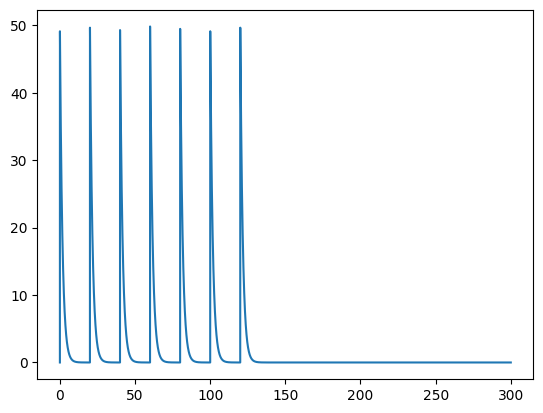

In [3]:
beta = 0.6
C0 = 50
Tiempo = np.linspace(0,300,10000)
T = 20
n = 7
plt.plot(Tiempo,[b1(k,T,n,beta) for k in Tiempo])
plt.show()

Caso 1

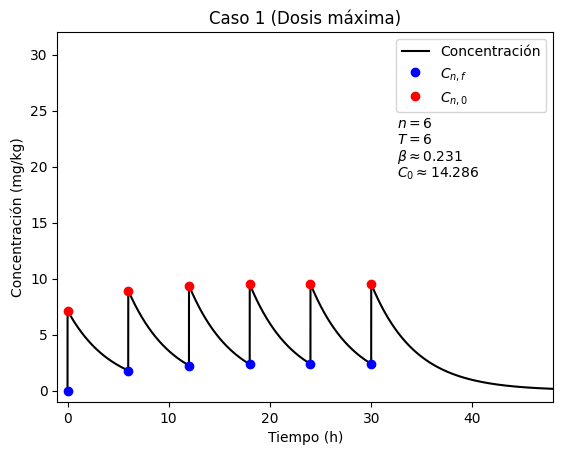

In [4]:
beta = (1/3)*np.log(2)
C0 = 50/7
T = 6
n = 6

Tiempo = np.linspace(0,48,10000)
plt.plot(Tiempo,[b1(k,T,n,beta) for k in Tiempo],'k-',label='Concentración')
plt.plot([0+i*T for i in range(n)],[b1(t,T,n,beta) for t in [0+i*T for i in range(n)]],'bo',label=r'$C_{n,f}$')
plt.plot([0+i*T for i in range(n)],[b1(t+0.001,T,n,beta) for t in [0+i*T for i in range(n)]],'ro',label=r'$C_{n,0}$')

plt.text(32.5,23.5,r'$n=6$')
plt.text(32.5,22,r'$T=6$')
plt.text(32.5,20.5,r'$\beta\approx 0.231$')
plt.text(32.5,19,r'$C_0\approx 14.286$')

plt.title('Caso 1 (Dosis máxima)')
plt.xlabel('Tiempo (h)')
plt.ylabel('Concentración (mg/kg)')
plt.xlim(-1,48)
plt.ylim(-1,32)
plt.legend()
plt.show()

Caso 2

0.17328679513998632


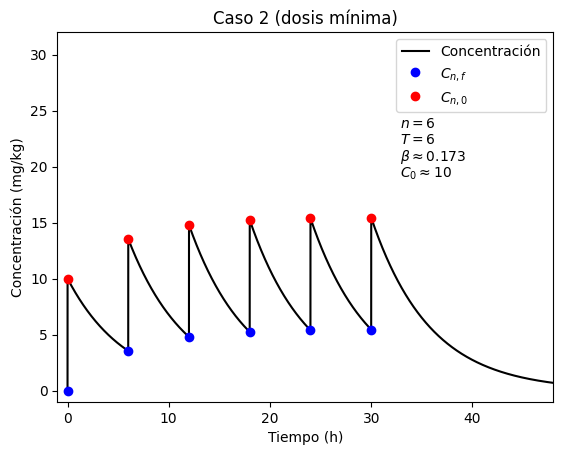

In [5]:
beta = (1/4)*np.log(2)
print(beta)
C0 = 10
T = 6
n = 6

Tiempo = np.linspace(0,48,10000)
plt.plot(Tiempo,[b1(k,T,n,beta) for k in Tiempo],'k-',label='Concentración')
plt.plot([0+i*T for i in range(n)],[b1(t,T,n,beta) for t in [0+i*T for i in range(n)]],'bo',label=r'$C_{n,f}$')
plt.plot([0+i*T for i in range(n)],[b1(t+0.001,T,n,beta) for t in [0+i*T for i in range(n)]],'ro',label=r'$C_{n,0}$')

plt.text(32.8,23.5,r'$n=6$')
plt.text(32.8,22,r'$T=6$')
plt.text(32.8,20.5,r'$\beta\approx 0.173$')
plt.text(32.8,19,r'$C_0\approx 10$')

plt.title('Caso 2 (dosis mínima)')
plt.xlabel('Tiempo (h)')
plt.ylabel('Concentración (mg/kg)')
plt.xlim(-1,48)
plt.ylim(-1,32)
plt.legend()
plt.show()

**Mejorando el modelo**

In [6]:
def b2(t,T,n):
  i = np.ceil(t/T)
  if t/T<=n:
    C = ((alpha*C0)/(beta-alpha)) * (np.exp(-alpha*t)*((1-np.exp(i*alpha*T))/(1-np.exp(alpha*T))) - np.exp(-beta*t)*((1-np.exp(i*beta*T))/(1-np.exp(beta*T)))   )
  else:
    C = ((alpha*C0)/(beta-alpha)) * (np.exp(-alpha*t)*((1-np.exp(n*alpha*T))/(1-np.exp(alpha*T))) - np.exp(-beta*t)*((1-np.exp(n*beta*T))/(1-np.exp(beta*T)))   )
  return(C)

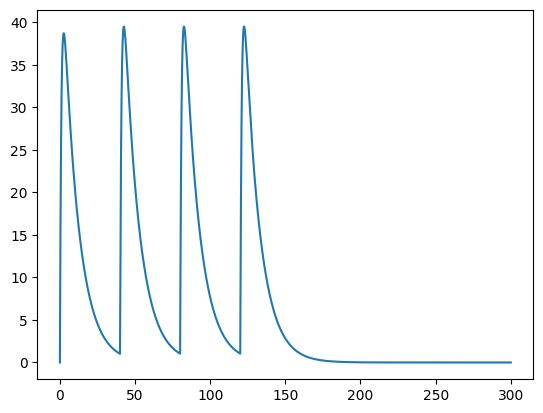

In [ ]:
alpha = 1.0
beta = 0.1
C0 = 50
Tiempo = np.linspace(0,300,10000)
T = 40
n = 4
plt.plot(Tiempo,[b2(k,T,n) for k in Tiempo])
plt.show()

Caso 1 (continuación)

In [7]:
tm = 3 #Vida media
tmax = 50/60 #Tiempo donde se alcanza el máximo

def system2(x):
  a,b = x[0],x[1]
  f1 = np.log(b/a)/(b-a)
  f2 = ( np.exp(-a*tmax) - np.exp(-b*tmax) )
  f3 = 2*(np.exp(-a*tm)-np.exp(-b*tm))
  return([f1-tmax,f2-f3])

initial_guess = [1, 0.1]
result = fsolve(system2, initial_guess)

print("Resultado:", result)
print("Aproximación:", system2(result))

Resultado: [2.71655858 0.39126001]
Aproximación: [3.878009025015672e-13, -1.0591527654923993e-13]


alpha  2.716558578475751
beta  0.3912600079422413


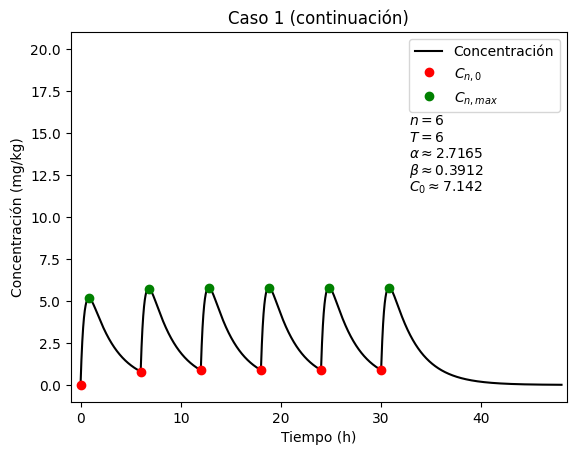

In [8]:
alpha, beta = result

print('alpha ',alpha)
print('beta ',beta)
T = 6
tmax = 50/60
C0 = 50/7
n = 6

Cmax = ((alpha*C0)/(beta-alpha)) * ((beta/alpha)**(-alpha/(beta-alpha))-(beta/alpha)**(-beta/(beta-alpha)))


Tiempo = np.linspace(0,48,10000)

plt.plot(Tiempo,[b2(k,T,n) for k in Tiempo],'k-',label='Concentración')
plt.plot([0+i*T for i in range(n)],[b2(t,T,n) for t in [0+i*T for i in range(n)]],'ro',label=r'$C_{n,0}$')
plt.plot([0.81+i*T for i in range(n)],[b2(t,T,n) for t in [0.8+i*T for i in range(n)]],'go',label=r'$C_{n,max}$')

plt.text(32.8,15.5,r'$n=6$')
plt.text(32.8,14.5,r'$T=6$')
plt.text(32.8,13.5,r'$\alpha\approx 2.7165$')
plt.text(32.8,12.5,r'$\beta\approx 0.3912$')
plt.text(32.8,11.5,r'$C_0\approx 7.142$')

plt.title('Caso 1 (continuación)')
plt.xlabel('Tiempo (h)')
plt.ylabel('Concentración (mg/kg)')
plt.xlim(-1,48.5)
plt.ylim(-1,21)
plt.legend()
plt.show()

Caso 2 (continuación)

alpha  2.716558578475751
beta  0.3912600079422413


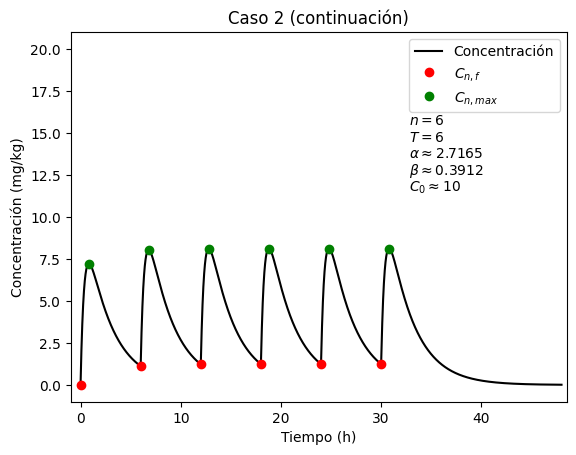

In [13]:
alpha, beta = result

print('alpha ',alpha)
print('beta ',beta)
T = 6
tmax = 50/60
C0 = 10
n = 6

Cmax = ((alpha*C0)/(beta-alpha)) * ((beta/alpha)**(-alpha/(beta-alpha))-(beta/alpha)**(-beta/(beta-alpha)))


Tiempo = np.linspace(0,48,10000)

plt.plot(Tiempo,[b2(k,T,n) for k in Tiempo],'k-',label='Concentración')
plt.plot([0+i*T for i in range(n)],[b2(t,T,n) for t in [0+i*T for i in range(n)]],'ro',label=r'$C_{n,f}$')
plt.plot([0.81+i*T for i in range(n)],[b2(t,T,n) for t in [0.8+i*T for i in range(n)]],'go',label=r'$C_{n,max}$')

plt.text(32.8,15.5,r'$n=6$')
plt.text(32.8,14.5,r'$T=6$')
plt.text(32.8,13.5,r'$\alpha\approx 2.7165$')
plt.text(32.8,12.5,r'$\beta\approx 0.3912$')
plt.text(32.8,11.5,r'$C_0\approx 10$')

plt.title('Caso 2 (continuación)')
plt.xlabel('Tiempo (h)')
plt.ylabel('Concentración (mg/kg)')
plt.xlim(-1,48.5)
plt.ylim(-1,21)
plt.legend()
plt.show()

alpha  2.716558578475751
beta  0.3912600079422413


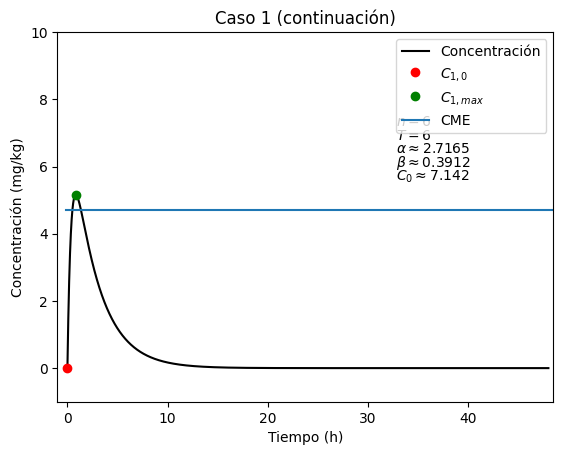

In [9]:
alpha, beta = result

print('alpha ',alpha)
print('beta ',beta)
T = 6
tmax = 50/60
C0 = 50/7
n = 1
Cmax = ((alpha*C0)/(beta-alpha)) * ((beta/alpha)**(-alpha/(beta-alpha))-(beta/alpha)**(-beta/(beta-alpha)))


Tiempo = np.linspace(0,48,10000)

plt.plot(Tiempo,[b2(k,T,n) for k in Tiempo],'k-',label='Concentración')
plt.plot([0+i*T for i in range(n)],[b2(t,T,n) for t in [0+i*T for i in range(n)]],'ro',label=r'$C_{1,0}$')
plt.plot([0.81+i*T for i in range(n)],[b2(t,T,n) for t in [0.8+i*T for i in range(n)]],'go',label=r'$C_{1,max}$')
plt.plot([-0.1,49],[b2(0.5,T,n),b2(0.5,T,n)],label="CME")


plt.text(32.8,7.2,r'$n=6$')
plt.text(32.8,6.8,r'$T=6$')
plt.text(32.8,6.4,r'$\alpha\approx 2.7165$')
plt.text(32.8,6.0,r'$\beta\approx 0.3912$')
plt.text(32.8,5.6,r'$C_0\approx 7.142$')

plt.title('Caso 1 (continuación)')
plt.xlabel('Tiempo (h)')
plt.ylabel('Concentración (mg/kg)')
plt.xlim(-1,48.5)
plt.ylim(-1,10)
plt.legend()
plt.show()